**Fitness Analytics: Predictive Modeling & Insights Dashboard** 📊💪

A Comprehensive Analysis of Workout Performance Data

Overview

**This notebook performs:**

  * Exploratory Data Analysis (EDA)
  * Interactive Visualizations
  * Feature Engineering
  * Predictive Modeling
  * Performance Analysis
  
Dataset Features
  * Demographic Data (Age, Gender)
  * Physical Metrics (Height, Weight, BMI)
  * Workout Information (Type, Duration, Frequency)
  * Performance Metrics (BPM, Calories Burned)
  * Body Composition (Fat Percentage, Water Intake)

In [1]:
from IPython.display import clear_output
try:
   !pip install plotly --upgrade
   clear_output()
except:
   print('Error installing libraries')
finally:
   print('Libraries installed successfully')
# import plotly.io as pio
# pio.renderers.default = 'colab'
# pio.renderers.default = 'iframe'
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

Libraries installed successfully


In [2]:
# Set style for better visualization
plt.style.use('fivethirtyeight')
sns.set_palette('pastel')

In [3]:
# import files
from google.colab import files
uploaded = files.upload()

Saving gym_members_exercise_tracking.csv to gym_members_exercise_tracking.csv


In [4]:
df = pd.read_csv('gym_members_exercise_tracking.csv')
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (973, 15)


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [5]:
print("Workout Info:")
df.info()

Workout Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 n

## 📊 Statistical Data Check

In [32]:
# Check for missing data values
print("Missing Data:")
df.isnull().sum()

Missing Data:


,0
Age,0
Gender,0
Weight (kg),0
Height (m),0
Max_BPM,0
Avg_BPM,0
Resting_BPM,0
Session_Duration (hours),0
Calories_Burned,0
Workout_Type,0


In [33]:
# Data description
print("Data Description:")
df.describe()

Data Description:


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Intensity_Score,Efficiency_Score,Calories_Per_Hour
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127,2.343489,10.450609,720.421266
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879,0.733591,2.868521,86.936255
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000,0.704712,4.837450,539.896373
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000,1.835701,8.434687,655.555556
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000,2.316983,9.975560,715.267176
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000,2.823457,12.310738,781.944444
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000,5.253006,20.802080,929.530201


In [34]:
# unique value
print("Unique Values:")
df.nunique()

Unique Values:


,0
Age,42
Gender,2
Weight (kg),532
Height (m),51
Max_BPM,40
Avg_BPM,50
Resting_BPM,25
Session_Duration (hours),147
Calories_Burned,621
Workout_Type,4


## 🔥 Heatmap

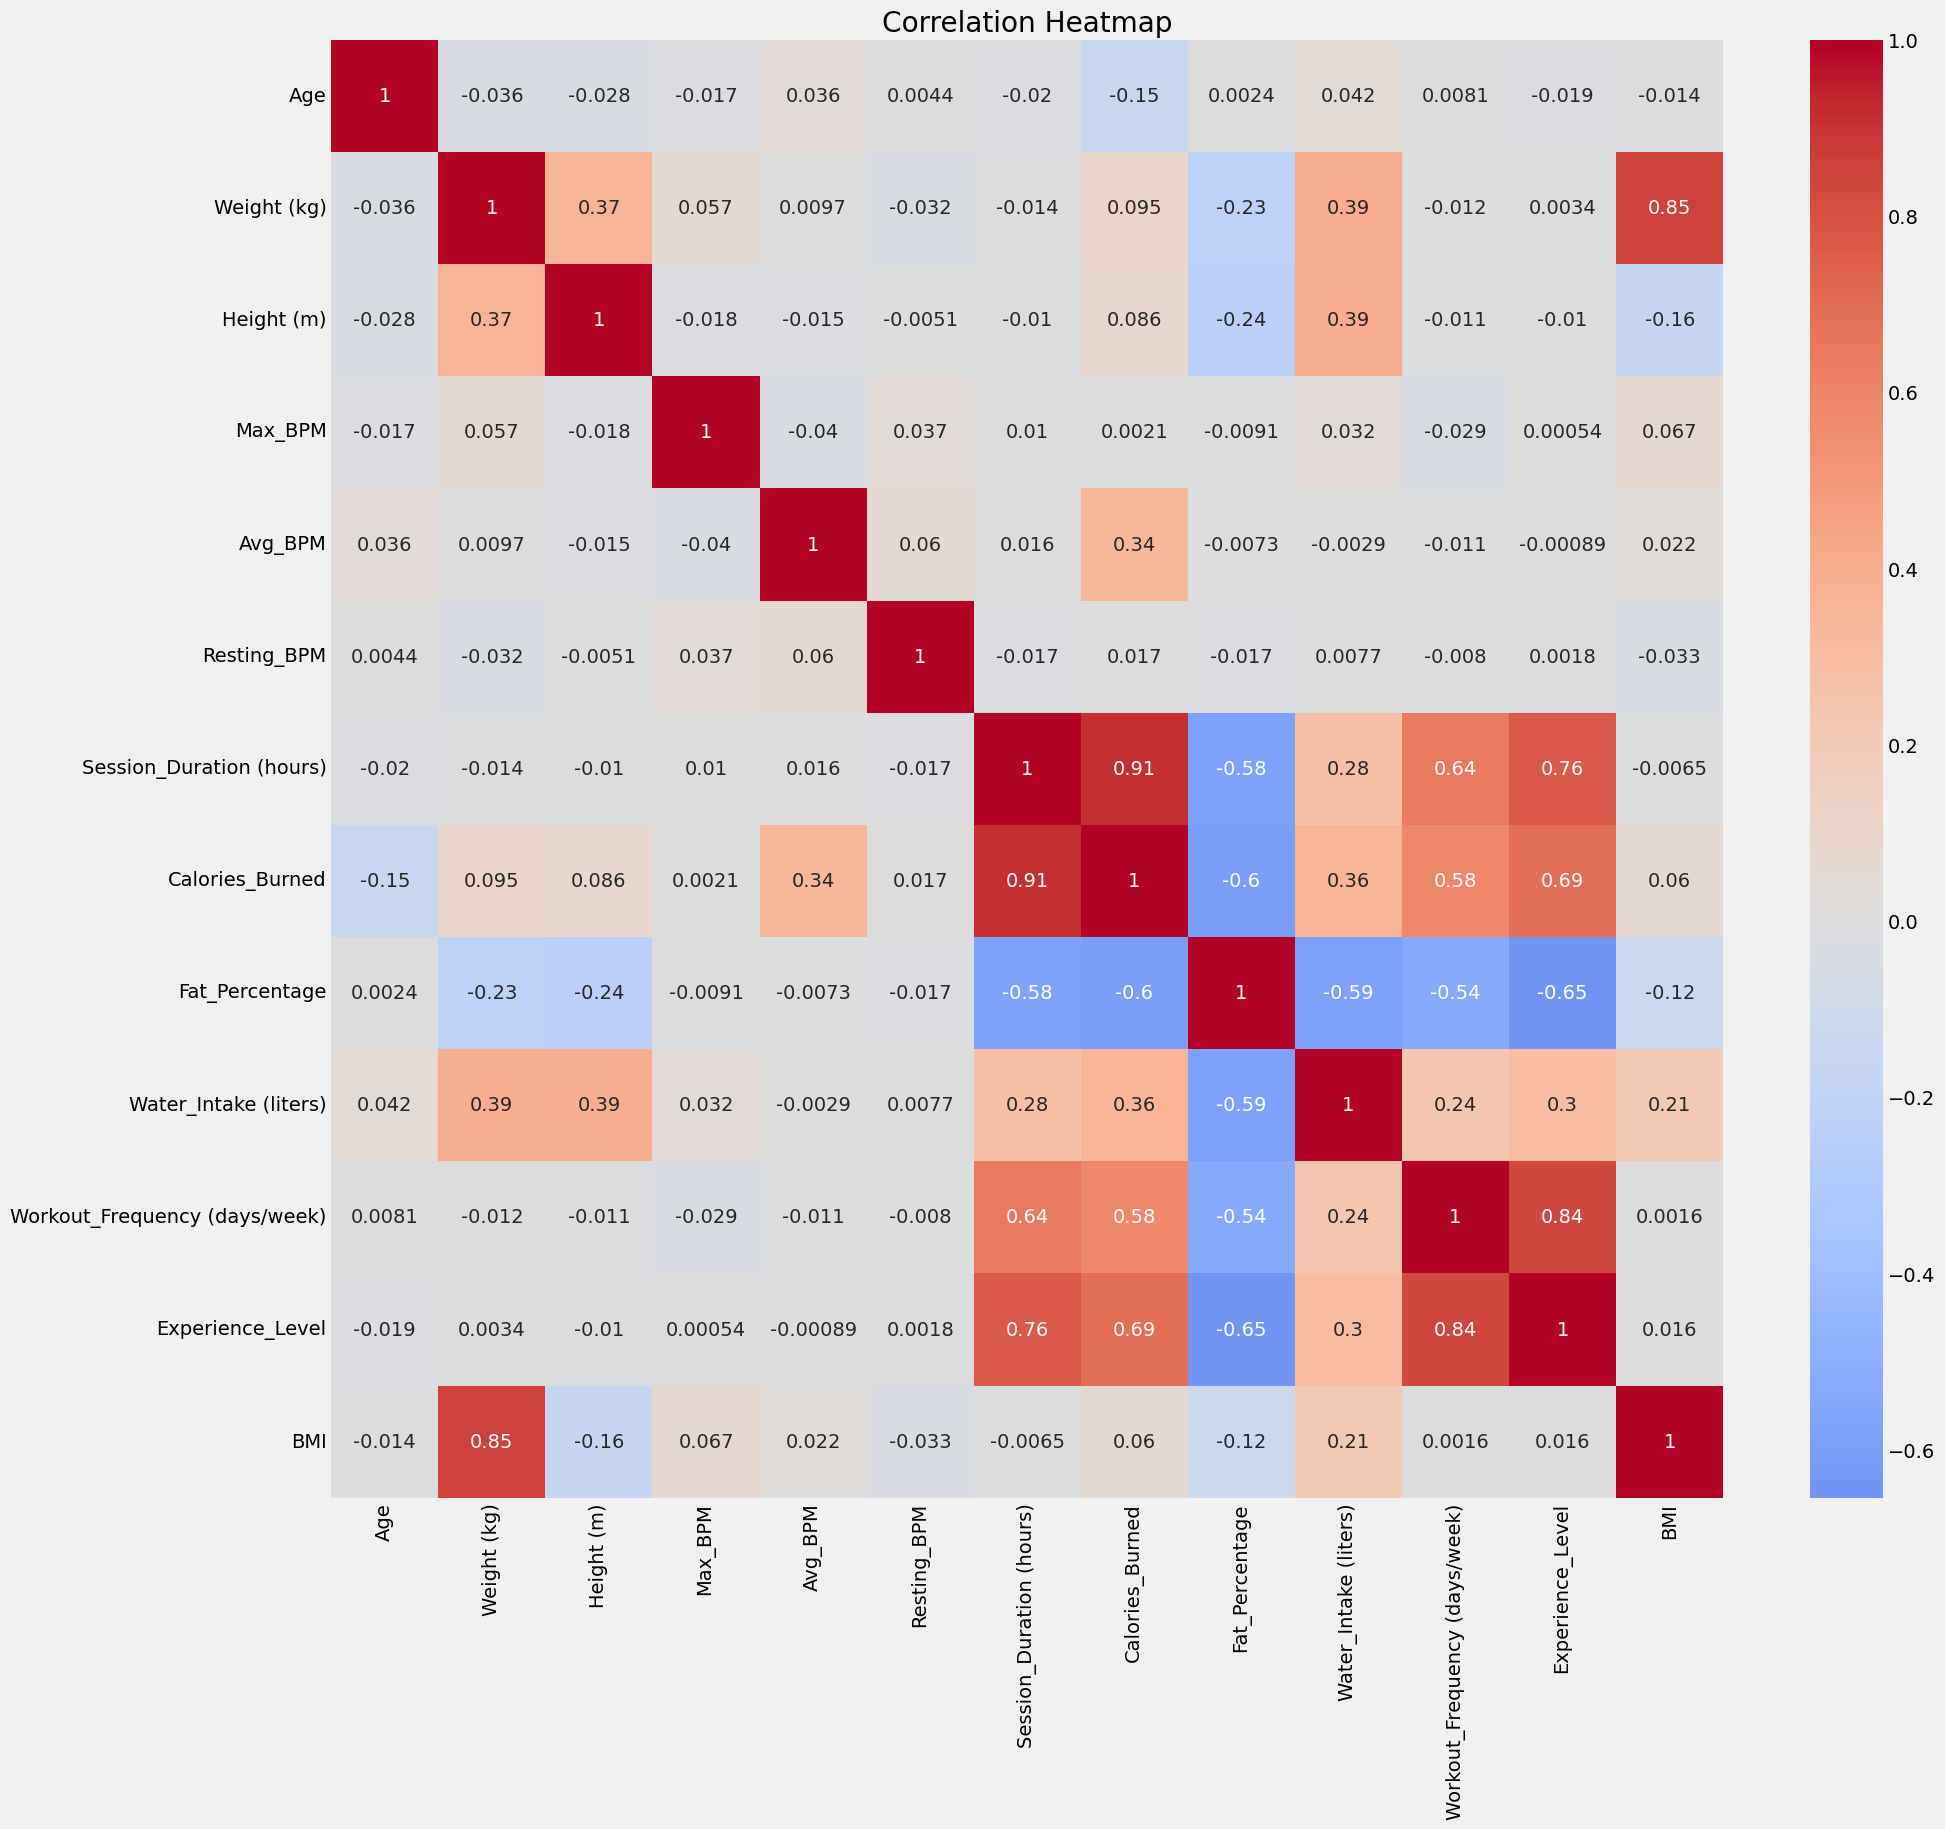

In [9]:
# correlation map
plt.figure(figsize=(20, 18))
num_cols = df.select_dtypes(include=[np.number]).columns
corr = df[num_cols].corr()
plt.title('Correlation Heatmap')
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)

plt.show()


## 🧮 Interactive Viz

In [10]:
# Gender age distribution
# fig = px.histogram(df, x='Age', color='Gender', title='Gender Distribution', marginal='box')
# # fig.update_layout(bargap=0.2)
# fig.show()
fig = px.histogram(df, x='Age', color='Gender', title='Gender Distribution', marginal='box')
fig.update_layout(bargap=0.2)
fig.show()

In [11]:
# calories burned v BMI
fig2 = px.scatter(df, x='BMI', y='Calories_Burned', color='Workout_Type',size='Experience_Level', hover_data=['Age', 'Gender'],title='Calories Burned vs BMI')
fig2.show()

In [12]:
# Work_out Type
fig3 = px.pie(df, names='Workout_Type', title='Workout Type Distribution')
fig3.show()

In [13]:
import plotly.express as px

# Get value counts of 'Gender'
gender_counts = df["Gender"].value_counts()

# Create the pie chart
fig = px.pie(values=gender_counts.values, names=gender_counts.index, title='Gender Distribution')
fig.update_layout(
    title={
        'text': "Gender Distribution",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    }
)
fig.show()

# fig = px.pie(df, values = df["Gender"]. value_counts().values, names=df["Gender"]. value_counts().index)
# fig.update_layout(title = "Men and Women Who Exercise Regularly", plot_bgcolor = "rgba(255,255,255,0.5)", paper_bgcolor = 'black', font = dict (color = 'White'))
# fig.show()

In [14]:
fig5 = px.box(df, x='Workout_Type', y=['Avg_BPM', 'Max_BPM'],
              title='BPM Distribution by Workout Type')
fig5.show()

## 📈 Interactive Dashboard

In [15]:
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=["Calories Burned by Workout Type", "Session Duration Distribution",
                    "Fat Percentage vs Water Intake",
                   "Workout Frequency Distribution"]
)

# Calories by workout type
avg_calories_burned = df.groupby('Workout_Type')['Calories_Burned'].mean()
fig.add_trace(go.Bar(
    x=avg_calories_burned.index,
    y=avg_calories_burned.values,
     name='Calories Burned by Workout Type'),
              row=1, col=1)

# session duration
fig.add_trace(go.Histogram(x=df['Session_Duration (hours)'],
                            name='Session Duration Distribution'),
              row=1, col=2)

# Workout frequency
workout_frequency = df['Workout_Frequency (days/week)'].value_counts()
fig.add_trace(go.Bar(x=workout_frequency.index, y=workout_frequency.values,
                     name='Workout Frequency Distribution'),
              row=2, col=1)

# Fat % vs Water Intake
fig.add_trace(go.Scatter( x=df['Water_Intake (liters)'], y=df['Fat_Percentage'],
                          mode='markers',
                          name='Fat Percentage vs Water Intake'),
              row=2, col=2)

fig.update_layout(height=800, width=1200)
fig.show()

#

## 🪜 More EDA

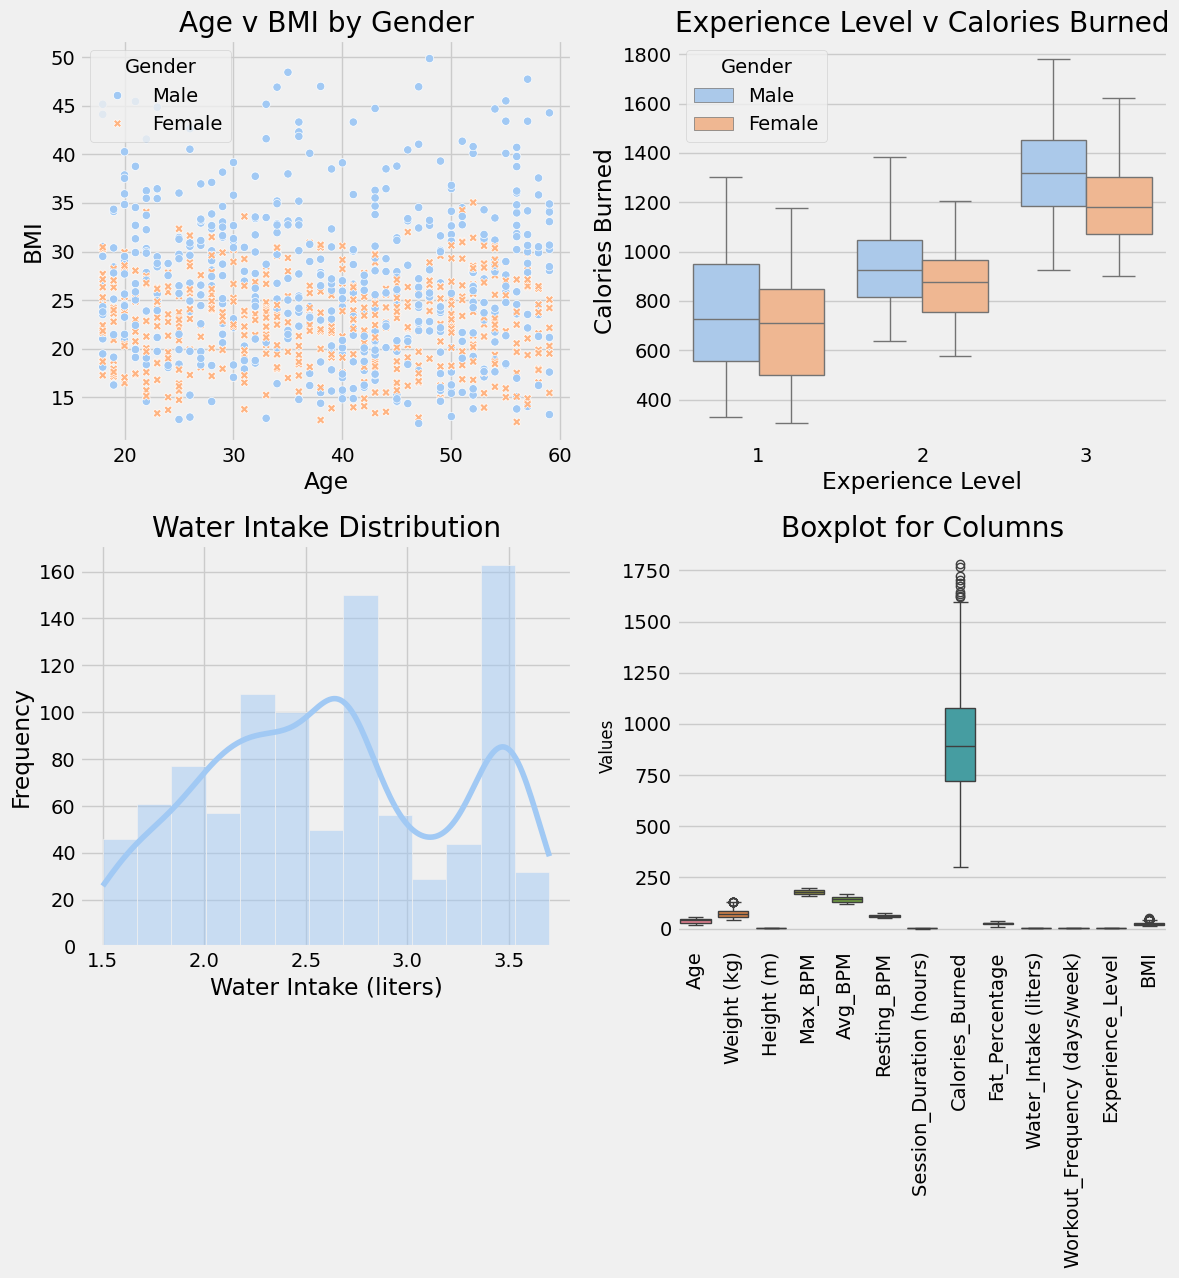

In [22]:
plt.figure(figsize=(12, 13))

# Age v BMI by Gender
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='Age', y='BMI', hue='Gender', style='Gender')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age v BMI by Gender')

# Experience Level v Calories Burned
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Experience_Level', y='Calories_Burned', hue='Gender')
plt.xlabel('Experience Level')
plt.ylabel('Calories Burned')
plt.title('Experience Level v Calories Burned')

# Water Intake Dist.
plt.subplot(2, 2, 3)
sns.histplot(data=df, x='Water_Intake (liters)', kde=True)
plt.xlabel('Water Intake (liters)')
plt.ylabel('Frequency')
plt.title('Water Intake Distribution')

# boxplot for columns
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.subplot(2, 2, 4)
sns.boxplot(data=df[numeric_columns])
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=90)
plt.title('Boxplot for Columns')

plt.tight_layout()
plt.show()

#


## 🔀 Feature Engineering

In [24]:
# BMI categories
df['BMI_Category'] = pd.cut(df['BMI'], bins=[0, 18.5, 24.9, 29.9, float('inf')],
                            labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Intensity Score
df['Intensity_Score'] = (df['Avg_BPM']/df['Resting_BPM']) * \
                        (df['Session_Duration (hours)'] / df['Session_Duration (hours)'].mean())

# Efficiency Score
df['Efficiency_Score'] = df['Calories_Burned'] / (df['Session_Duration (hours)'] * df['Weight (kg)'])

# calories By the hour
df['Calories_Per_Hour'] = df['Calories_Burned'] / df['Session_Duration (hours)']

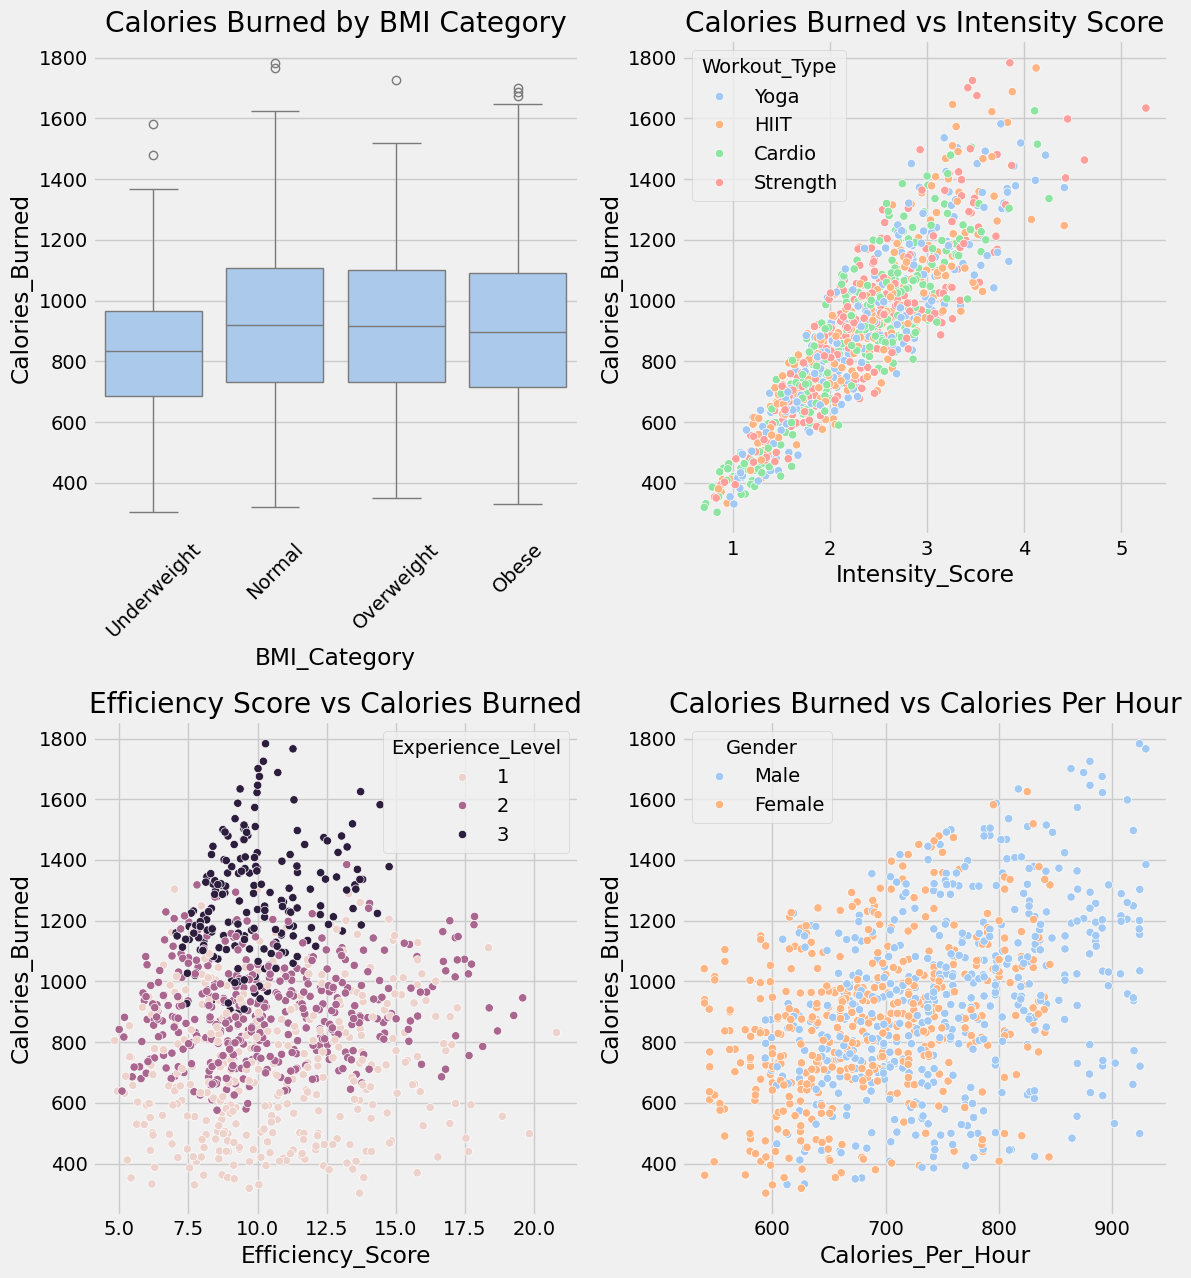

In [25]:
# Visualization
plt.figure(figsize=(12, 13))

plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='BMI_Category', y='Calories_Burned')
plt.title('Calories Burned by BMI Category')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='Intensity_Score', y='Calories_Burned', hue='Workout_Type')
plt.title('Calories Burned vs Intensity Score')

plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='Efficiency_Score', y='Calories_Burned', hue='Experience_Level')
plt.title('Efficiency Score vs Calories Burned')

plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='Calories_Per_Hour', y='Calories_Burned', hue='Gender')
plt.title('Calories Burned vs Calories Per Hour')

plt.tight_layout()
plt.show()

#

# 🔄 Preprocessing

In [26]:
# dataframe
df_preprocessed = df.copy()

# encode
label_encoder = LabelEncoder()
categorical_cols = ['Gender', 'Workout_Type', 'BMI_Category']
df_preprocessed[categorical_cols] = df_preprocessed[categorical_cols].apply(label_encoder.fit_transform)

#scaling
scaler = StandardScaler()
numeric_cols = df_preprocessed.select_dtypes(include=['int64', 'float64']).columns
df_preprocessed[numeric_cols] = scaler.fit_transform(df_preprocessed[numeric_cols])

## 🔍 Model Training

In [29]:
# features and target
X = df_preprocessed.drop(columns=['Calories_Burned'], axis=1)
y = df_preprocessed['Calories_Burned']

# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# model evaluation
print('\nModel Evaluation:')
print(f'R2 Score: {r2_score(y_test, y_pred) :.4f}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}')
#


Model Evaluation:
R2 Score: 0.9911
RMSE: 0.1002


## 📊 Feature Importance

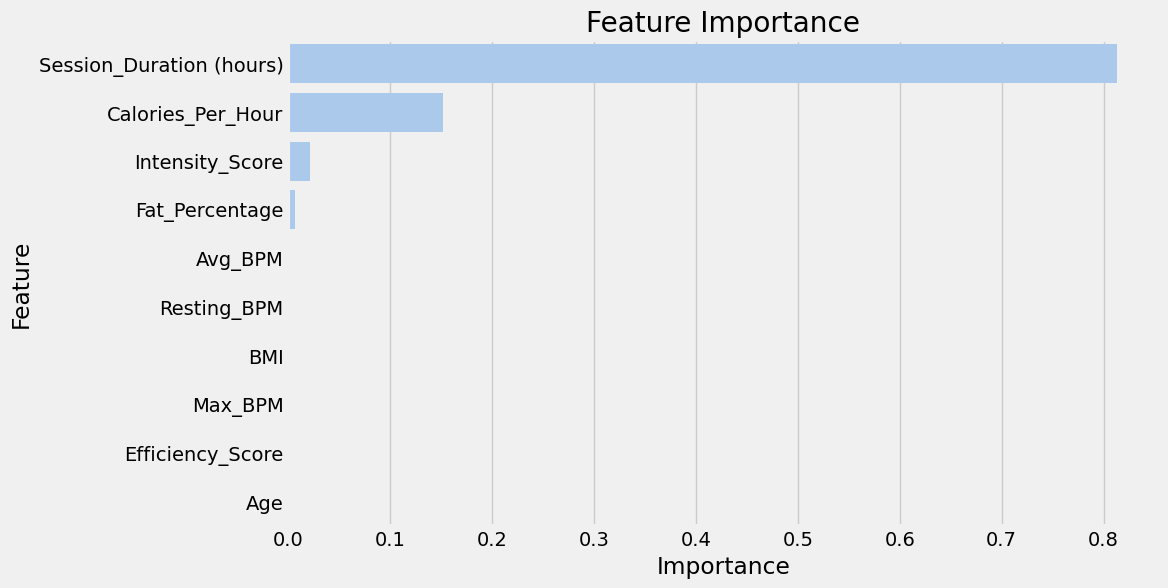

In [31]:
# plot
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#